K Means Clustering algo to group customers of a retail store based on their purchase history

dataset - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

---



In [6]:
!unzip "/content/archive (4).zip"

Archive:  /content/archive (4).zip
  inflating: Mall_Customers.csv      


In [7]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
# Load the customer data
df = pd.read_csv('/content/Mall_Customers.csv')

# Extract the relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [14]:
# Define the number of clusters (Trial and error start with n = 3,4,5,...) based on the visualization we can decide the most suitable n
num_clusters = 5

# Create a KMeans object
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to the data
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Obtain the cluster centroids
centroids = kmeans.cluster_centers_

# Calculate the spending score for each cluster
cluster_spending_scores = []
for i in range(num_clusters):
    cluster_spending_scores.append(np.mean(X[labels == i, 1]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


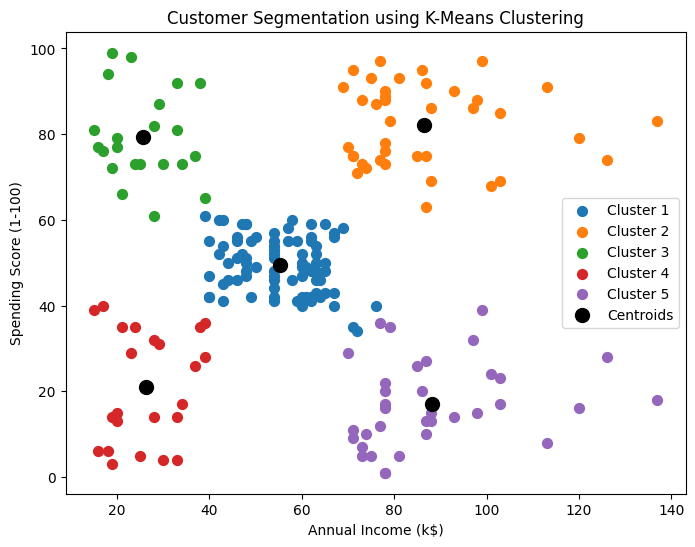

Cluster 1: Spending Score = 50
Cluster 2: Spending Score = 82
Cluster 3: Spending Score = 79
Cluster 4: Spending Score = 21
Cluster 5: Spending Score = 17


In [16]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label='Cluster {}'.format(i + 1))
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

for i in range(num_clusters):
    print('Cluster {}: Spending Score = {}'.format(i + 1, round(cluster_spending_scores[i])))
